In [6]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [5]:
conda install pandas numpy matplotlib seaborn scikit-learn joblib -y

Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\naidu\anaconda3\envs\plant_disease_env

  added / updated specs:
    - joblib
    - matplotlib
    - numpy
    - pandas
    - scikit-learn
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.13.2             |   py39haa95532_2         595 KB
    ------------------------------------------------------------
                                           Total:         595 KB

The following NEW packages will be INSTALLED:

  bottleneck         pkgs/main/win-64::bottleneck-1.4.2-py39hc99e966_0 
  icc_rt             pkgs/main/win-64::icc_rt-2022.1.0-h6049295_2 
  joblib             pkgs/main/win-64::joblib-1.4.2-py39haa95532_0 
  numexpr            pkgs/main/win-64::numexpr-2.10.1-py39h4cd664f_0 
  pandas             pkgs/main/win-64::pandas-2.2.3-py39h5da7b33_0 
  pybind11-abi     



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.3.1




In [10]:
# 2. Load Dataset (corrected for TSV)
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [11]:
# 3. Check Missing Values
print(df.isnull().sum())

Review    0
Liked     0
dtype: int64


In [12]:
# 4. Exploratory Data Analysis
print(df['Liked'].value_counts())

Liked
1    500
0    500
Name: count, dtype: int64


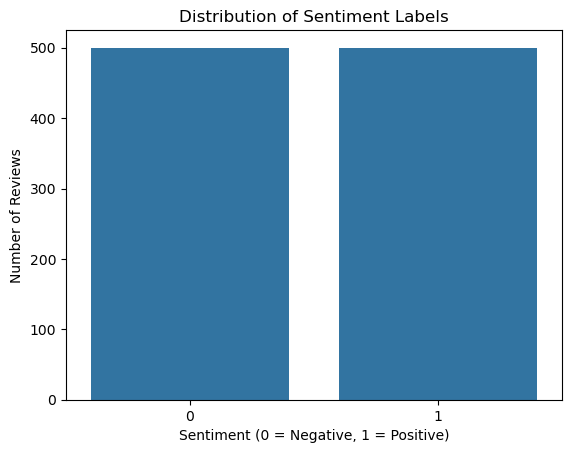

In [13]:
sns.countplot(x='Liked', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Number of Reviews')
plt.show()

In [14]:
# 5. Prepare Features and Labels
x = df['Review'].values
y = df['Liked'].values

In [15]:
# 6. Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [16]:
# 7. Build Pipeline (Vectorizer + Classifier)
text_model = make_pipeline(CountVectorizer(stop_words='english'), SVC(kernel='linear'))


In [17]:
# 8. Train the Model
text_model.fit(x_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('svc', SVC(kernel='linear'))])

In [18]:
# 9. Predict on Test Set
y_pred = text_model.predict(x_test)

In [19]:
# 10. Evaluate the Model
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 77.5 %

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.84      0.78        97
           1       0.82      0.72      0.77       103

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.77       200


Confusion Matrix:
 [[81 16]
 [29 74]]


In [20]:
# 11. Save the Pipeline Model
joblib.dump(text_model, 'positive-negative.pkl')

['positive-negative.pkl']

In [21]:
# 12. Load the Model and Predict New Reviews
loaded_model = joblib.load('positive-negative.pkl')

In [22]:
# Example Predictions
new_reviews = ["the food is excellent", "bad service and tasteless food"]
for review in new_reviews:
    pred = loaded_model.predict([review])
    if pred[0] == 1:
        print(f"✅ Positive Review --> {review}")
    else:
        print(f"❌ Negative Review --> {review}")

✅ Positive Review --> the food is excellent
❌ Negative Review --> bad service and tasteless food
